In [1]:
import matplotlib.pyplot as plt
import pandas as pd


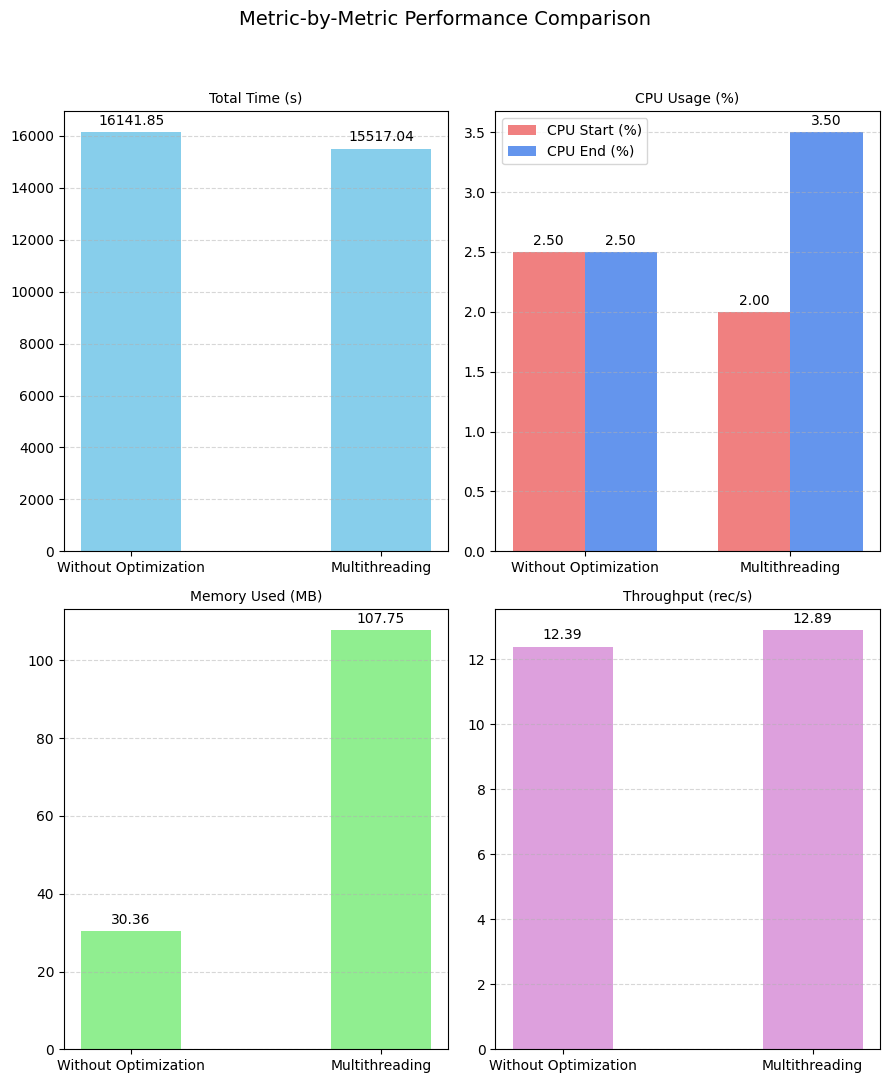

In [2]:
# Labels
metrics = ['Total Time (s)', 'CPU Start (%)', 'CPU End (%)', 'Memory Used (MB)', 'Throughput (rec/s)']
without_opt = [16141.85, 2.5, 2.5, 197.24 - 166.88, 12.39]
multithreading = [15517.04, 2.0, 3.5, 274.76 - 167.01, 12.89]
versions = ['Without Optimization', 'Multithreading']

# Plotting each metric in a separate subplot (2 rows, 2 columns for 4 plots)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 11), sharey=False)
axes = axes.flatten()  # Flatten 2D axes array for easier indexing

# Index reference for CPU subplot (combined CPU Start and End)
cpu_index = 1
colors = ['skyblue', 'salmon', 'lightgreen', 'plum']

for i, ax in enumerate(axes):
    # Adjust the metric index because CPU Start and End are combined
    metric_index = i if i < cpu_index else i + 1

    if i == cpu_index:
        # Combined CPU Start and End
        x = range(len(versions))
        bar_width = 0.35

        start_values = [without_opt[1], multithreading[1]]
        end_values = [without_opt[2], multithreading[2]]

        bars1 = ax.bar([p - bar_width/2 for p in x], start_values, width=bar_width, label='CPU Start (%)', color='lightcoral')
        bars2 = ax.bar([p + bar_width/2 for p in x], end_values, width=bar_width, label='CPU End (%)', color='cornflowerblue')

        ax.set_xticks(x)
        ax.set_xticklabels(versions)
        ax.set_title('CPU Usage (%)', fontsize=10)
        ax.grid(axis='y', linestyle='--', alpha=0.5)
        ax.legend()

        for bars in [bars1, bars2]:
            for bar in bars:
                height = bar.get_height()
                ax.annotate(f'{height:.2f}',
                            xy=(bar.get_x() + bar.get_width()/2, height),
                            xytext=(0, 3),
                            textcoords='offset points',
                            ha='center', va='bottom')
    else:
        # Regular metric bar plot
        values = [without_opt[metric_index], multithreading[metric_index]]
        bars = ax.bar(versions, values, color=colors[i], width=0.4)
        ax.set_title(metrics[metric_index], fontsize=10)
        ax.grid(axis='y', linestyle='--', alpha=0.5)

        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height:.2f}',
                        xy=(bar.get_x() + bar.get_width()/2, height),
                        xytext=(0, 3),
                        textcoords='offset points',
                        ha='center', va='bottom')

plt.suptitle('Metric-by-Metric Performance Comparison', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [6]:

data = {
    'Technique': ['Pandas', 'Dask', 'Polars'],
    'Total processing time (s)': [
        [4.03, 2.89, 2.80],
        [6.70, 6.86, 6.38],
        [0.58, 0.35, 0.59]
    ],
    'Memory usage (MB)': [
        [269.84, 243.20, 218.34],
        [552.43, 447.21, 395.86],
        [319.55, 203.18, 240.30]
    ],
    'CPU usage (%)': [
        [0.0, 0.0, 0.0],
        [1.0, 1.0, 0.0],
        [1.0, 1.0, 1.0]
    ],
    'Throughput (rec/s)': [
        [51029.69, 71183.34, 51488.39],
        [30719.88, 29994.33, 18149.05],
        [356363.62, 200205.37, 224245.89]
    ]
}

# Create a DataFrame from the average of each metric
avg_data = {
    'Technique': data['Technique'],
    'Total processing time (s)': [round(sum(val) / len(val), 2) for val in data['Total processing time (s)']],
    'Memory usage (MB)': [round(sum(val) / len(val), 2) for val in data['Memory usage (MB)']],
    'CPU usage (%)': [round(sum(val) / len(val), 2) for val in data['CPU usage (%)']],
    'Throughput (rec/s)': [round(sum(val) / len(val), 2) for val in data['Throughput (rec/s)']]
}

# Create a DataFrame
df = pd.DataFrame(avg_data)

print(df)


  Technique  Total processing time (s)  Memory usage (MB)  CPU usage (%)  \
0    Pandas                       3.24             243.79           0.00   
1      Dask                       6.65             465.17           0.67   
2    Polars                       0.51             254.34           1.00   

   Throughput (rec/s)  
0            57900.47  
1            26287.75  
2           260271.63  


<Figure size 1400x1000 with 0 Axes>

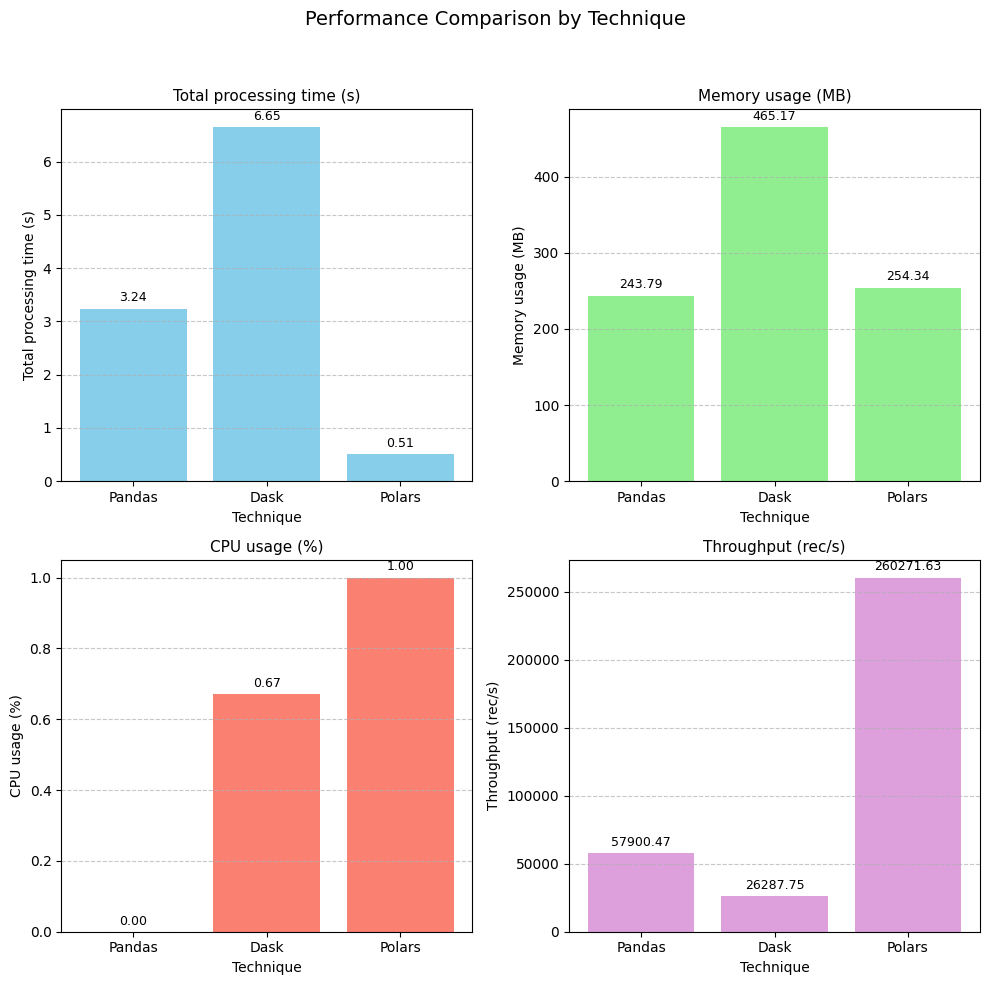

In [17]:


# Set figure size
plt.figure(figsize=(14, 10))

# Plot each metric in a subplot
metrics = ['Total processing time (s)', 'Memory usage (MB)', 'CPU usage (%)', 'Throughput (rec/s)']
colors = ['skyblue', 'lightgreen', 'salmon', 'plum']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
axes = axes.flatten()

for i, (ax, metric) in enumerate(zip(axes, metrics)):
    bars = ax.bar(df['Technique'], df[metric], color=colors[i])
    ax.set_title(metric, fontsize=11)
    ax.set_ylabel(metric)
    ax.set_xlabel('Technique')
    ax.grid(axis='y', linestyle='--', alpha=0.7)


    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords='offset points',
                    ha='center', va='bottom', fontsize=9)

plt.suptitle('Performance Comparison by Technique', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
